<a href="https://colab.research.google.com/github/kushalnavghare/DSC-540-ADVNCD_ML/blob/master/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSC540 Project 2

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Do not change the code already present in the notebook.
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell.
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions.
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   
    
> **Do not ZIP the files.**

Good Luck!

### Kushal Navghare

**Honor Pledge:**  
I pledge on my honor that I, **Student Name**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment.



## Project Description

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com).  
Lending Club connects people who need money (borrowers) with people who have money (investors).   
Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Check out more info on Lending Club on [Wikipedia](https://en.wikipedia.org/wiki/Lending_Club). Lending Club also had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016).

This dataset is from before they went public.

We will use lending data from 2007-2010 and will try to classify and predict whether or not the borrower paid back their loan in full. You will analyze the data file provided.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
* not.fully.paid: Whether the loan was paid back or not.

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
%config InlineBackend.figure_format ='retina'
RANDOM_STATE = 42

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [9]:
import sklearn
sklearn.__version__

'1.2.2'

In [10]:
pd.set_option('display.max_columns', 100)

### These are the packages I used

In [11]:
# Your package imports here

In [12]:
# google colab setup
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [13]:
%cd gdrive/MyDrive/Colab\ Notebooks/DATA

/content/gdrive/MyDrive/Colab Notebooks/DATA


# Q1
- Read in the dataset `loan_data.csv`
- How many rows and variables are there?
- What are the unique values of `not.fully.paid`?
- `not.fully.paid` having a value of 1 means that the person who took the loan did not fully pay it back. What's the proportion of those people in the full dataset?

## Get the Data

**Use pandas to read in the datasets as a dataframe.**

In [14]:
loans = pd.read_csv('loans.csv')

**Check out the info(), head(), and describe() methods on loans.**

In [15]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


In [16]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000,2.981000e+03,2981.000000,2981.000000,2981.000000,2981.000000,2981.000000
mean,0.748071,0.125977,326.020778,10.898762,12.794119,705.839316,4460.703008,1.826035e+04,48.442170,1.868165,0.171419,0.073465,0.480711
std,0.434193,0.026565,213.108504,0.650773,6.986455,37.073906,2486.531742,4.029009e+04,29.251287,2.567033,0.526928,0.271035,0.499712
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,180.041667,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.109600,165.630000,10.498250,7.170000,677.000000,2760.041667,2.979000e+03,24.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.125300,275.570000,10.915088,12.870000,702.000000,4043.000000,8.493000e+03,48.800000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.142600,457.050000,11.289782,18.350000,732.000000,5640.041667,1.853800e+04,72.500000,3.000000,0.000000,0.000000,1.000000
max,1.000000,0.216400,926.830000,14.124465,29.960000,817.000000,17616.000000,1.207359e+06,119.000000,33.000000,6.000000,3.000000,1.000000


In [17]:
loans.shape

(2981, 14)

In [18]:
loans['not.fully.paid'].unique()

array([0, 1])

In [19]:
loans['not.fully.paid'].value_counts()[1]/loans.shape[0]

0.4807111707480711



*   How many rows and variables are there?
  - There are `2981 rows` in the dataset, with `14 variables`.
* What are the unique values of `not.fully.paid`?  
  - There are 2 unique values in `not.fully.paid`.
- `not.fully.paid` having a value of 1 means that the person who took the loan did not fully pay it back. What's the proportion of those people in the full dataset?
  - The proportion of not.fully.paid is about 48%.

# Q2
- Visual and Exploratory Analysis
- Carry out the tasks given below

## Exploratory Data Analysis

- Let's do some data visualization!
- You can use many different visualization libraries inclusing matplotlib, seaborn, pandasand many more. Feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

**Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

In [20]:
loans.head(2)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0
1,1,major_purchase,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0


Text(0.5, 1.0, 'Distribution of FICO over credit.policy')

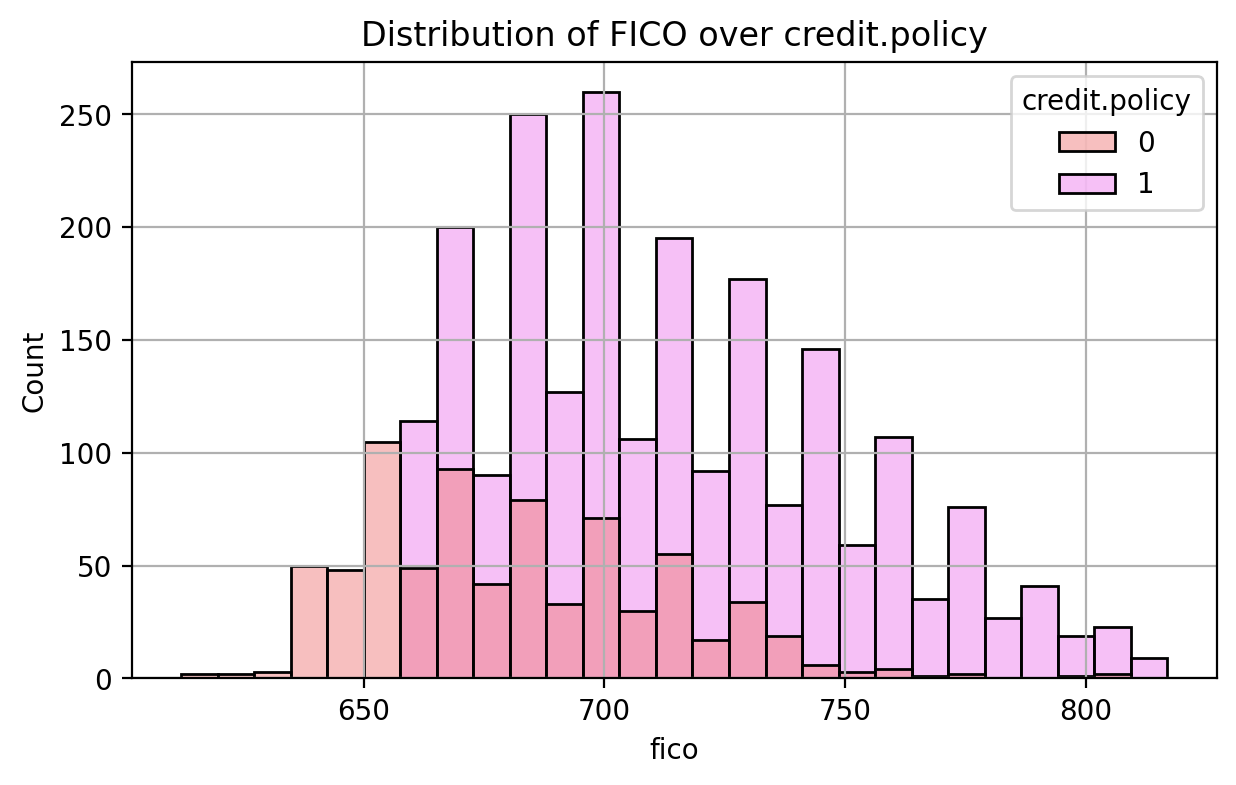

In [21]:
plt.figure(figsize=(7, 4))
sns.histplot(x='fico', data=loans, hue='credit.policy', palette={0:'lightcoral', 1:'violet'})
plt.grid()
plt.title("Distribution of FICO over credit.policy")

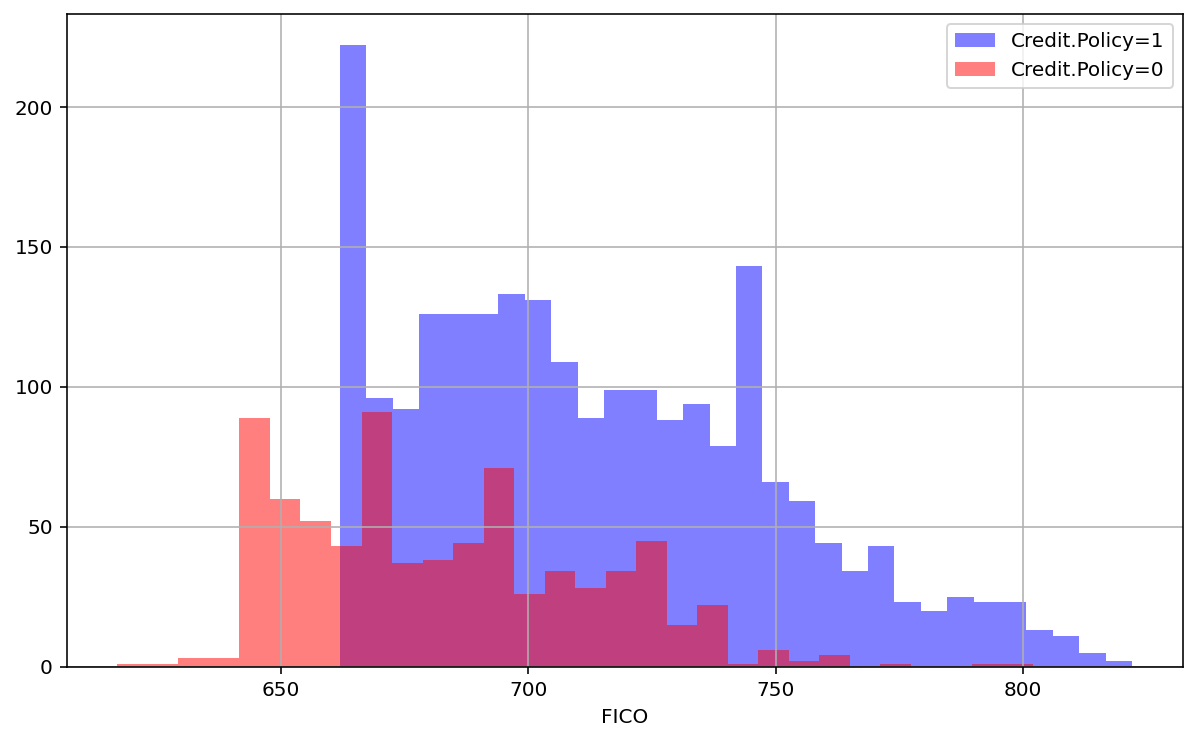

In [17]:
# Alternatively you can use seaborn library to create the same histogram (although due to bin creation, it might look different!)
import seaborn as sns

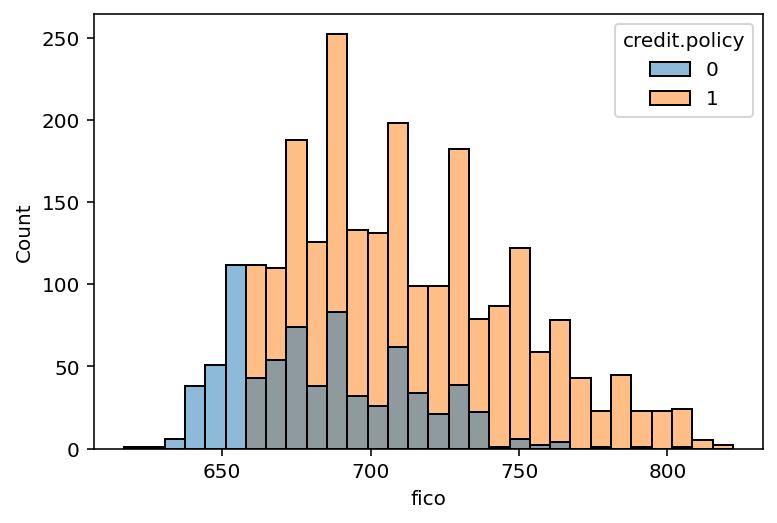

**Create another histogram for `not.fully.paid` column.**

Text(0.5, 1.0, 'Distribution of FICO over credit.policy')

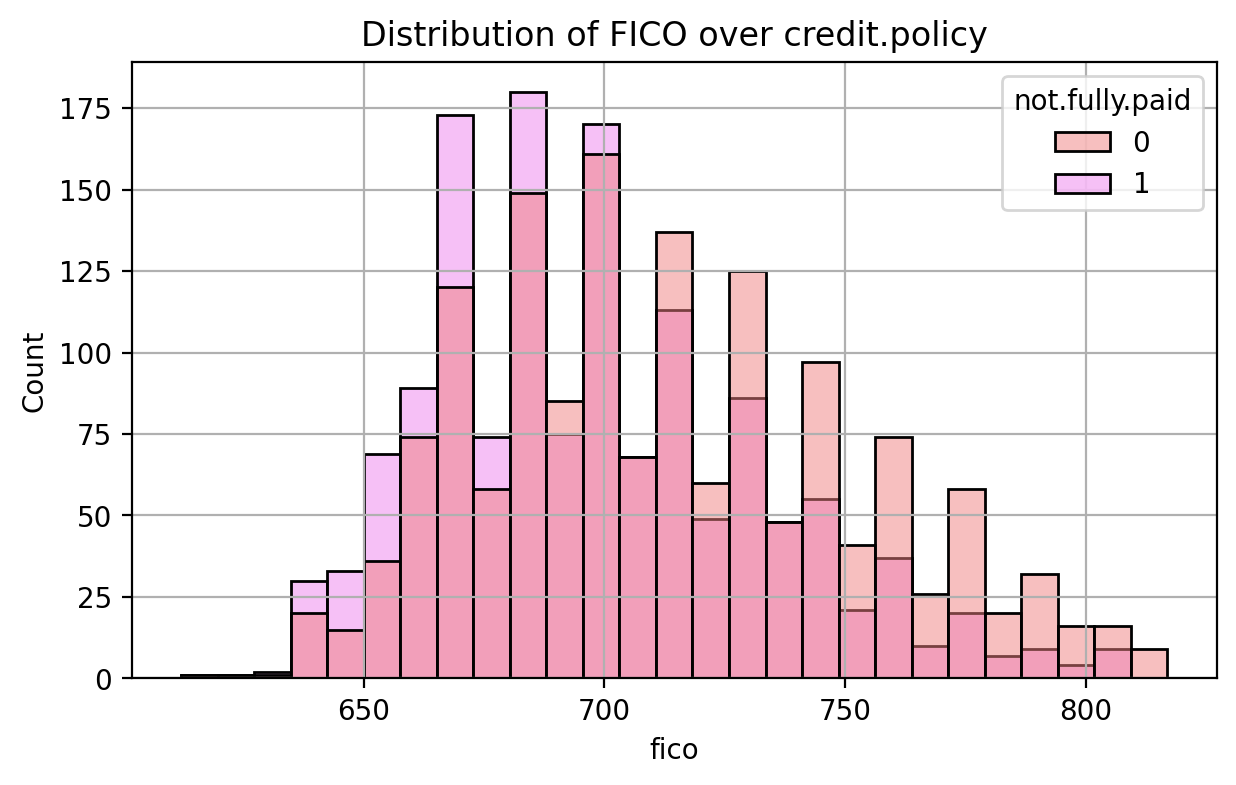

In [22]:
plt.figure(figsize=(7, 4))
sns.histplot(x='fico', data=loans, hue='not.fully.paid', palette={0:'lightcoral', 1:'violet'})
plt.grid()
plt.title("Distribution of FICO over credit.policy")

**Create a countplot (bar plot showing counts using seaborn) that shows the counts of loans by purpose, with the color hue defined by `not.fully.paid`**

In [23]:
loans.head

<bound method NDFrame.head of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1183       231.94   
1                 1      major_purchase    0.0774       124.88   
2                 1         credit_card    0.1505        86.73   
3                 1  debt_consolidation    0.1284       403.42   
4                 1  debt_consolidation    0.1531       278.53   
...             ...                 ...       ...          ...   
2976              0  debt_consolidation    0.1797       364.99   
2977              1  debt_consolidation    0.1316       202.63   
2978              1  debt_consolidation    0.1148       263.75   
2979              1    home_improvement    0.1442       859.57   
2980              1      major_purchase    0.0894       381.26   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          10.348846   5.69   712        2460.958333       6955        63.8   
1          11.26446

<Axes: xlabel='count', ylabel='purpose'>

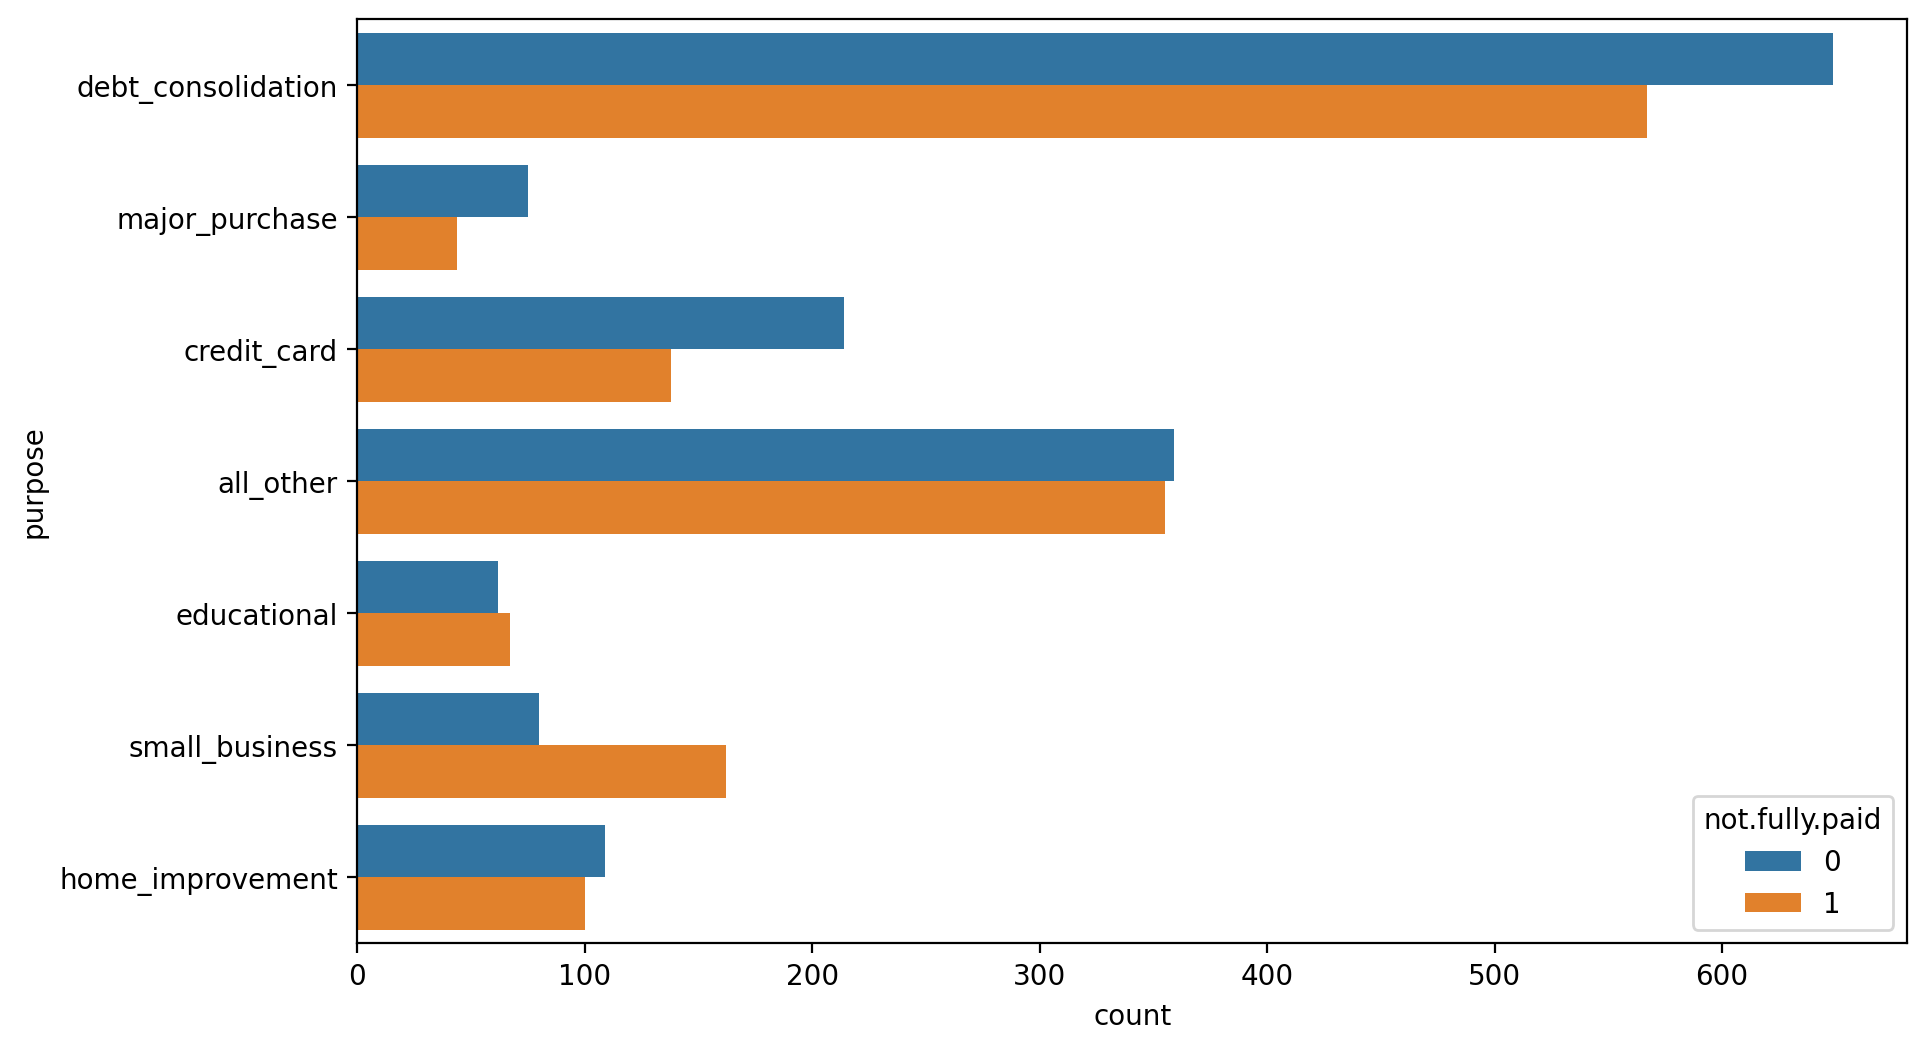

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(y='purpose', data=loans, hue='not.fully.paid', orient='v')

**Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

<Figure size 600x400 with 0 Axes>

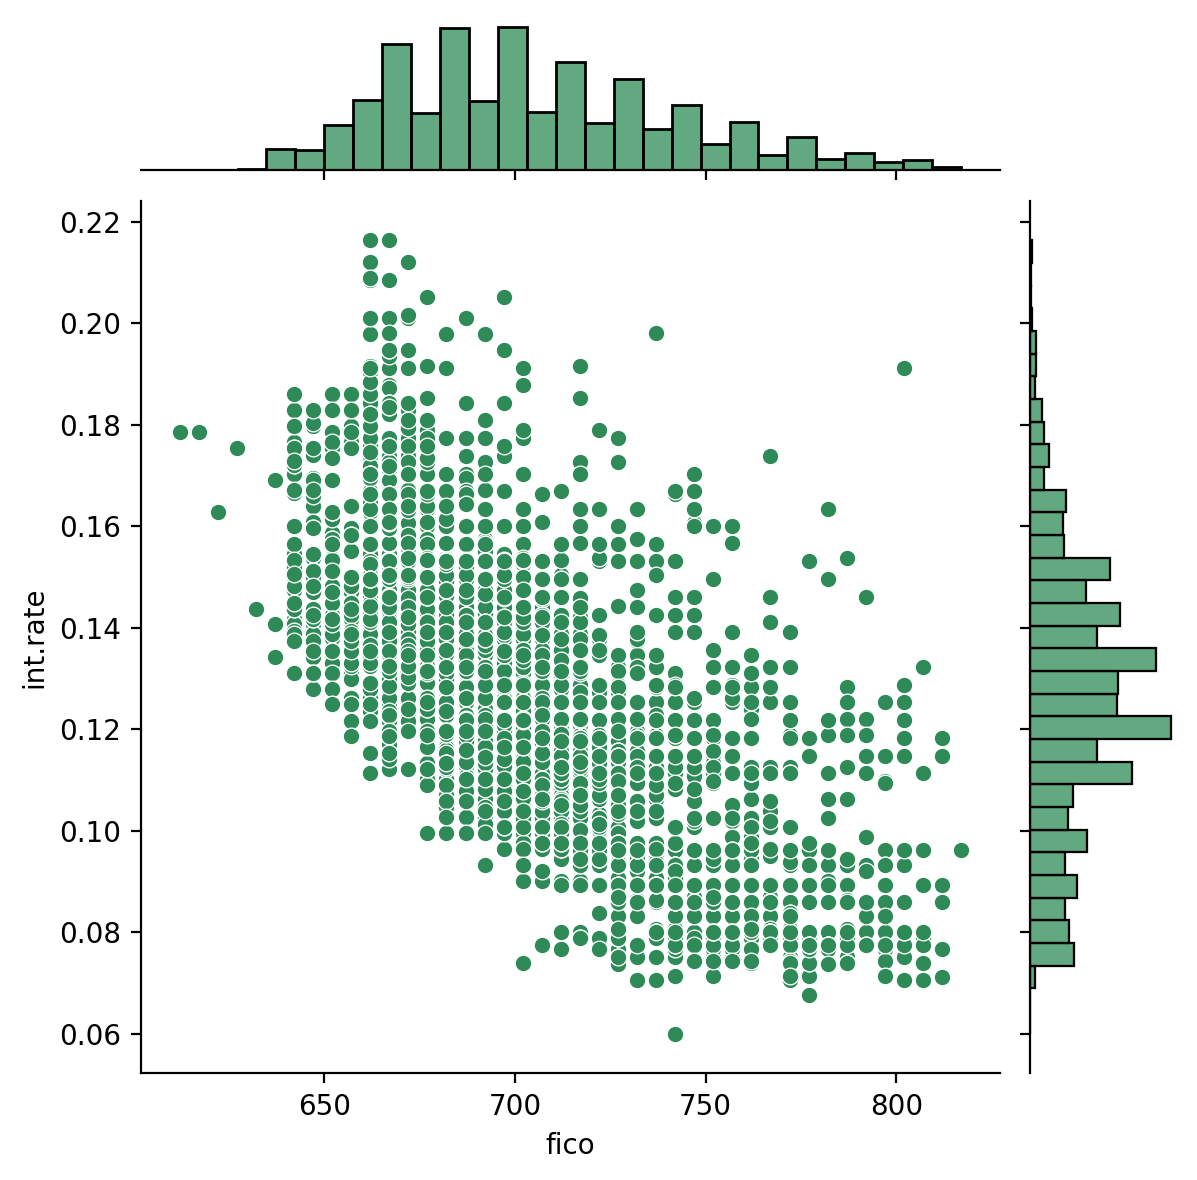

In [25]:
plt.figure(figsize=(6, 4))
sns.jointplot(x='fico', y='int.rate', data=loans, color='seagreen')

**Create the following lmplots to see if the trend differed between `not.fully.paid` and `int.rate`. Check the documentation for seaborn `lmplot()` if you can't figure out how to separate it into columns.**

<Figure size 600x400 with 0 Axes>

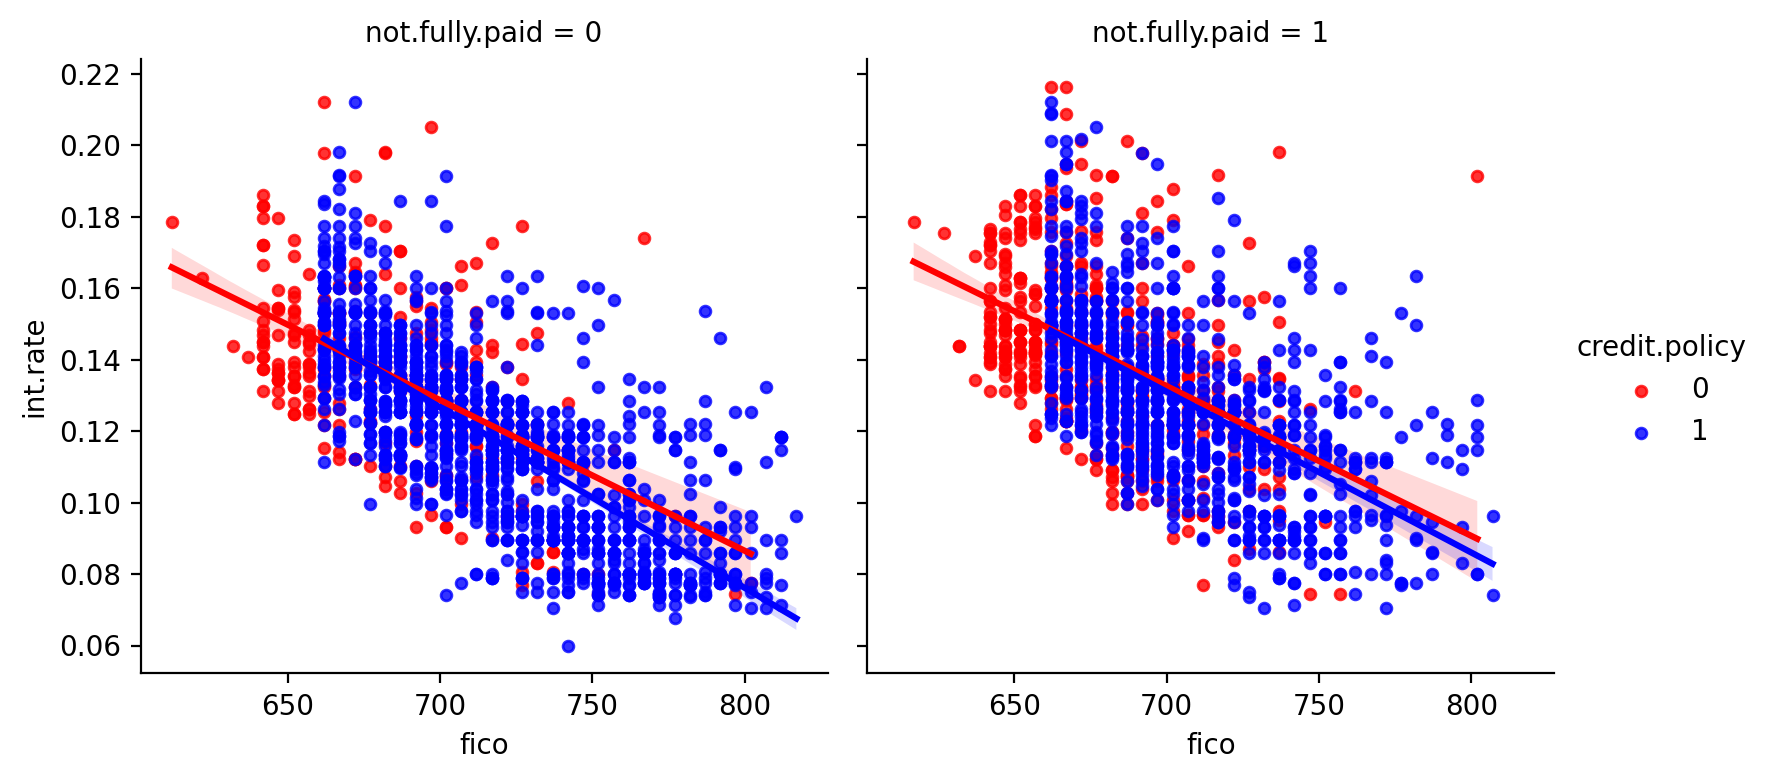

In [26]:
custom_palette = {0: "red", 1: "blue"}
plt.figure(figsize=(6, 4))
sns.lmplot(data=loans, x="fico", y="int.rate",
    hue="credit.policy", col="not.fully.paid", height=4, palette=custom_palette,
           scatter_kws={"s": 15})

<Figure size 792x504 with 0 Axes>

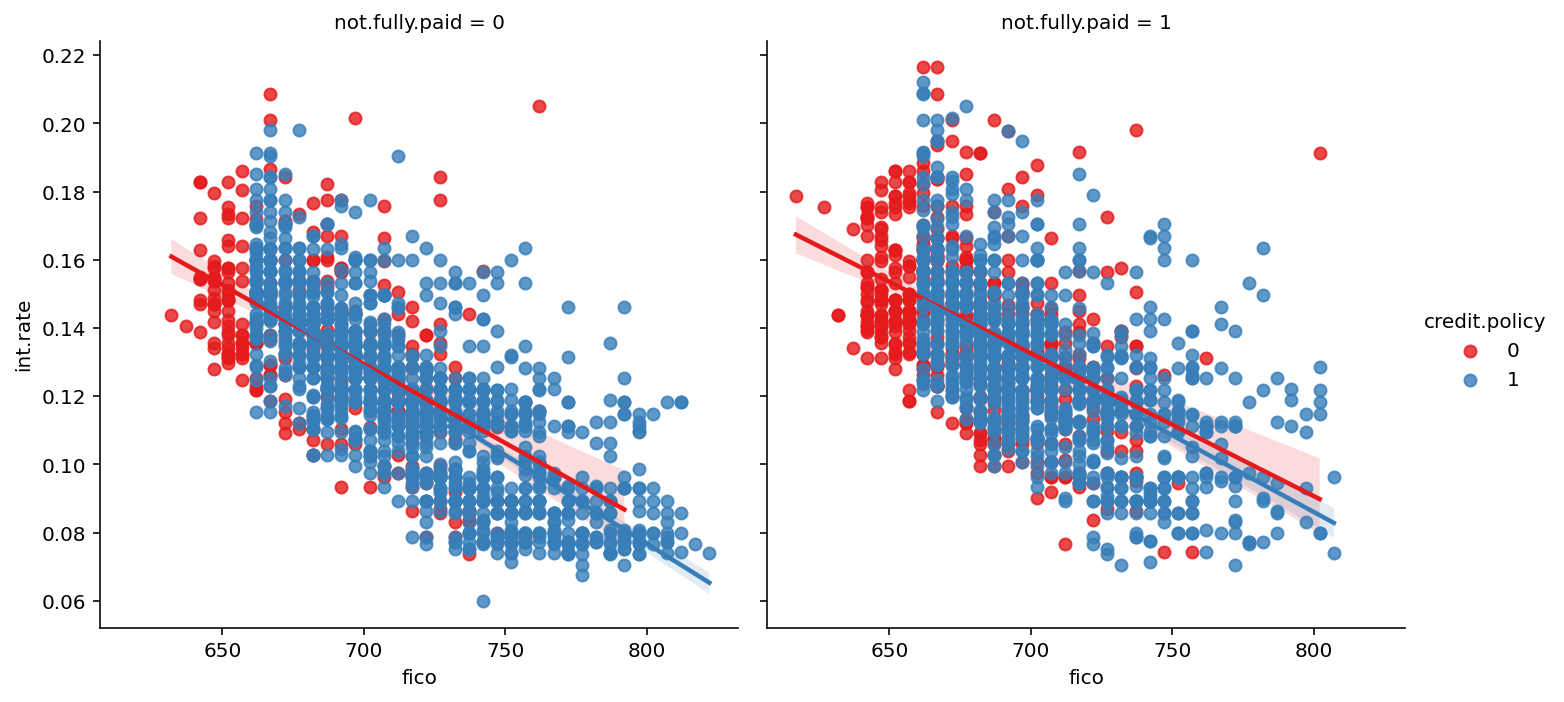

# Q3

## Setting up the Data

Let's get ready to set up our data for our models!

**This question has already been solved. You don't need to do anything. Just run the cells and continue.**

In [27]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      2981 non-null   int64  
 1   purpose            2981 non-null   object 
 2   int.rate           2981 non-null   float64
 3   installment        2981 non-null   float64
 4   log.annual.inc     2981 non-null   float64
 5   dti                2981 non-null   float64
 6   fico               2981 non-null   int64  
 7   days.with.cr.line  2981 non-null   float64
 8   revol.bal          2981 non-null   int64  
 9   revol.util         2981 non-null   float64
 10  inq.last.6mths     2981 non-null   int64  
 11  delinq.2yrs        2981 non-null   int64  
 12  pub.rec            2981 non-null   int64  
 13  not.fully.paid     2981 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 326.2+ KB


## Categorical Features

Notice that the **purpose** column is of categorical type.

That means we need to transform them using dummy variables so sklearn will be able to understand them.   

Let's do this in one step using pd.get_dummies().


> The same transformation needs to be aplied on the test set as well. The easiest way would be to merge train and test sets, and to split after the transformation.

In [28]:
cat_feats = ['purpose']

In [29]:
loans = pd.get_dummies(loans, columns=cat_feats, drop_first=False)

In [30]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               2981 non-null   int64  
 1   int.rate                    2981 non-null   float64
 2   installment                 2981 non-null   float64
 3   log.annual.inc              2981 non-null   float64
 4   dti                         2981 non-null   float64
 5   fico                        2981 non-null   int64  
 6   days.with.cr.line           2981 non-null   float64
 7   revol.bal                   2981 non-null   int64  
 8   revol.util                  2981 non-null   float64
 9   inq.last.6mths              2981 non-null   int64  
 10  delinq.2yrs                 2981 non-null   int64  
 11  pub.rec                     2981 non-null   int64  
 12  not.fully.paid              2981 non-null   int64  
 13  purpose_all_other           2981 

In [31]:
loans.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,0,0,1,0,0,0,0
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,0,0,0,0,0,1,0
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,0,1,0,0,0,0,0
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,0,0,1,0,0,0,0


## Train Test Split

Now its time to split our data into a training set and a validation set!  

The `not.fully.paid` variable is the one that we will try to predict.

**Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
loans

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1183,231.94,10.348846,5.69,712,2460.958333,6955,63.8,1,0,0,0,0,0,1,0,0,0,0
1,1,0.0774,124.88,11.264464,7.17,792,6360.041667,168,0.7,0,0,0,0,0,0,0,0,0,1,0
2,1,0.1505,86.73,11.184421,16.30,667,3600.000000,16242,95.5,0,0,0,0,0,1,0,0,0,0,0
3,1,0.1284,403.42,10.736397,19.57,697,3450.041667,27261,87.4,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1531,278.53,10.621327,8.20,662,1860.000000,7979,48.7,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,0,0.1797,364.99,10.762488,23.53,642,4252.041667,10226,63.9,1,1,0,0,0,0,1,0,0,0,0
2977,1,0.1316,202.63,11.156251,23.91,692,2130.000000,22713,43.1,1,0,0,0,0,0,1,0,0,0,0
2978,1,0.1148,263.75,10.491274,2.90,727,1800.000000,2980,31.7,1,0,0,0,0,0,1,0,0,0,0
2979,1,0.1442,859.57,12.611538,1.48,702,5279.958333,28367,66.5,2,1,0,0,0,0,0,0,1,0,0


In [34]:
X = loans.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=RANDOM_STATE)

<Axes: >

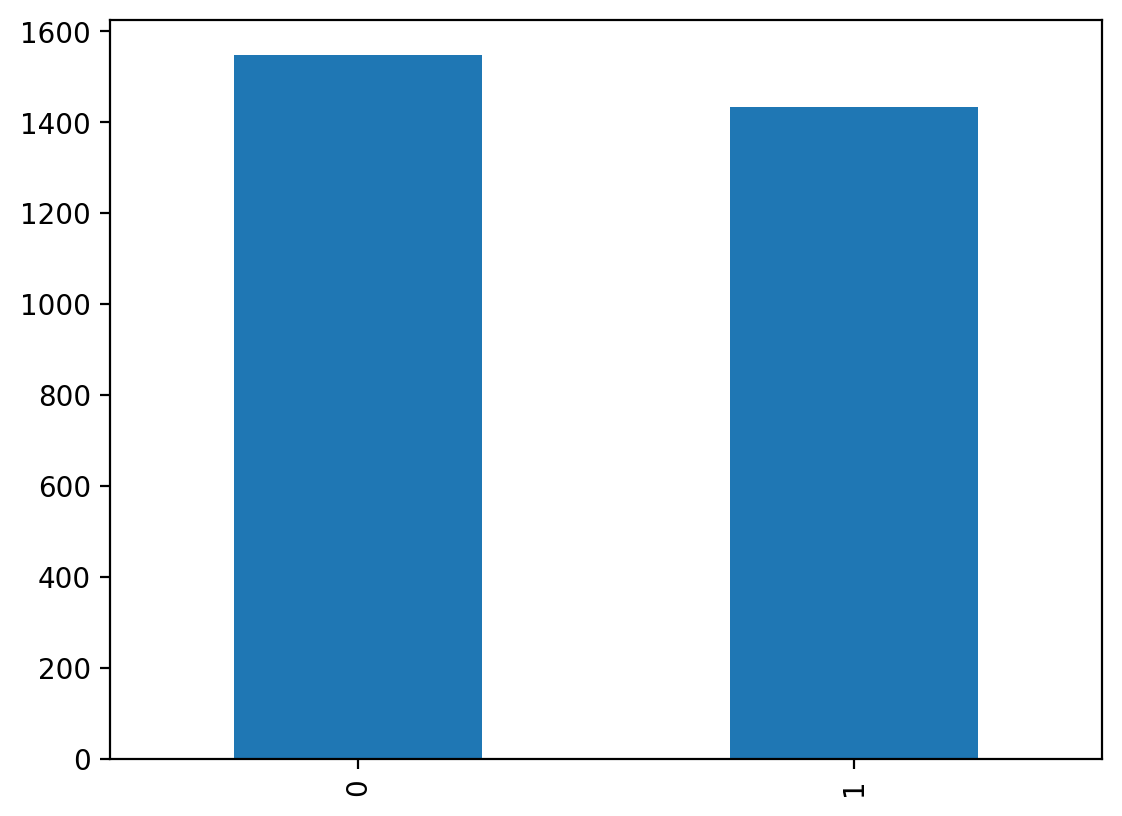

In [35]:
y.value_counts().plot(kind='bar')

<Axes: >

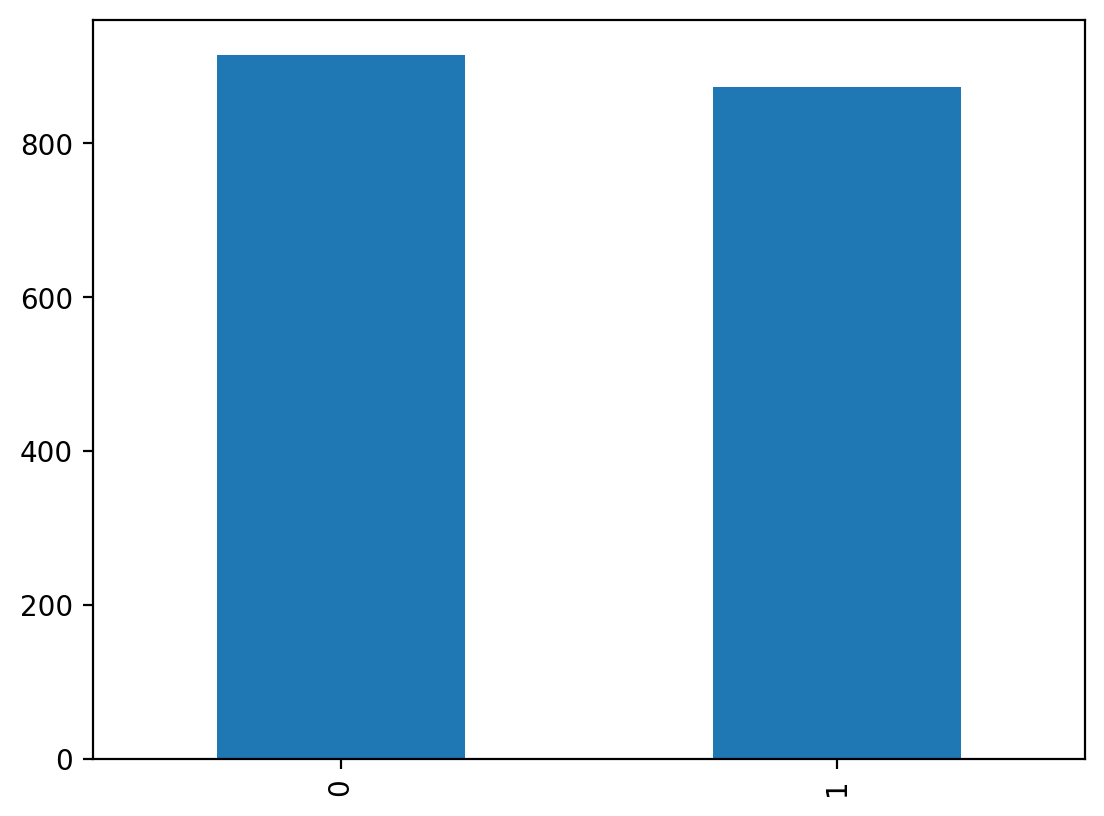

In [36]:
y_train.value_counts().plot(kind='bar')

<Axes: >

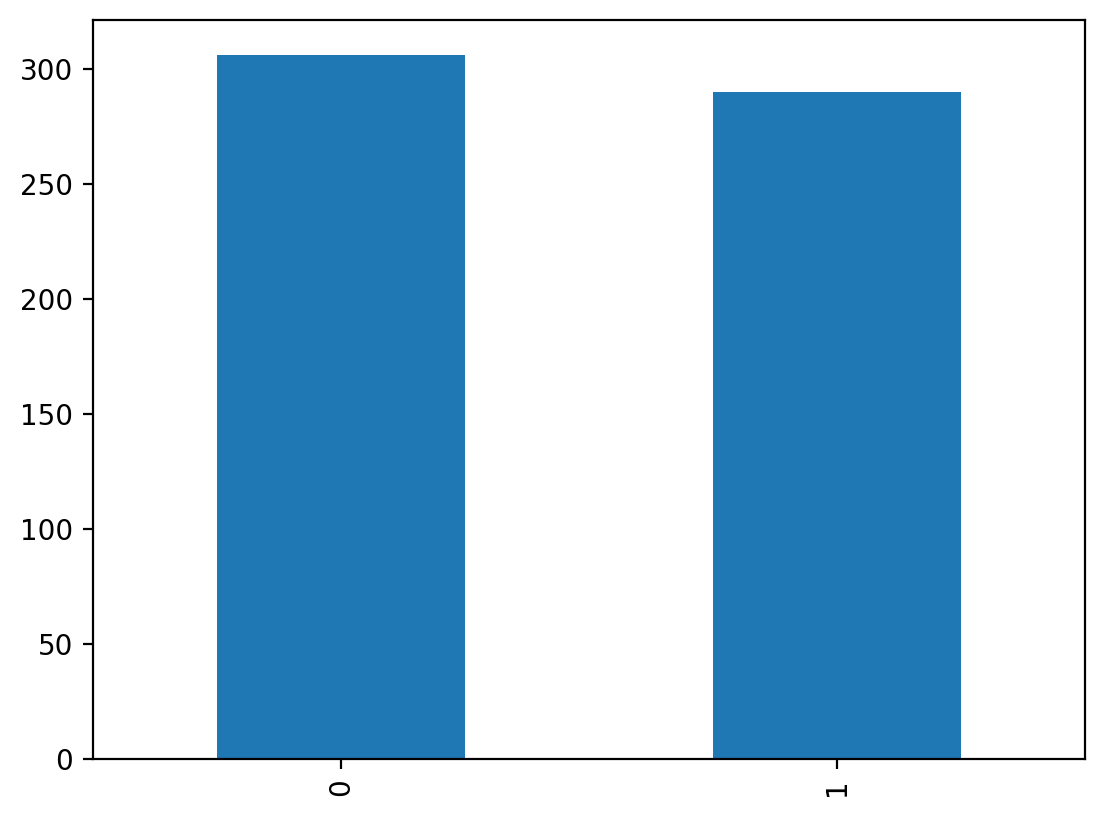

In [37]:
y_val.value_counts().plot(kind='bar')

> NOTE:

When asked to provide the performance metrics you can use the confusion matrix or the methods in `sklearn.metrics`.  
**Performance metrics** (at the very least):  
- Recall (Sensitivity)  
- Specificity  
- Precision  
- Balanced Accuracy  
- F1 Score  

Grid Search:
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


# Q4

## Decision Tree Model

Let's start by training a single decision tree first!

1. Default decision tree:
    - Initiate the Decision Tree classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.


2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Try several values for the `min_samples_split` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value.  
        - Using the best model provide the performance metrics for the validation set.
    - Try several values for the `max_depth` hyper-parameter and apply cross validation (`GridSearchCV`) to find the best value.
        - Using the best model provide the performance metrics for the validation set.
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split` and `max_depth`.
        - Using the best model provide the performance metrics for the validation set.
        
        
3. Create a chart showing the feature importances based on the best model obtained.

### Default decision tree

In [38]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, balanced_accuracy_score

In [34]:
# code
tree_baseline = DecisionTreeClassifier(random_state=RANDOM_STATE)
tree_baseline.fit(X_train, y_train)

# predictions
train_preds = tree_baseline.predict(X_train)
val_preds = tree_baseline.predict(X_val)

In [35]:
print('Train accuracy: ', accuracy_score(y_train, train_preds))
print('Validation accuracy: ', accuracy_score(y_val, val_preds))

Train accuracy:  1.0
Validation accuracy:  0.5620805369127517


In [36]:
print("Confusion Matrix\n")
print(confusion_matrix(y_val, val_preds))
tn, fp, fn, tp = confusion_matrix(y_val, val_preds).ravel()

Confusion Matrix

[[167 139]
 [122 168]]


In [37]:
recall = tp/(tp+fn)
specificity = tn / (tn+fp)
precision = tp/(tp+fp)
balanced_accuracy = (recall+specificity)/2
f1_score = ((precision*recall)/(precision+recall))*2

In [57]:
def printPerformanceMetrics(y_true, y_preds):
  """
    Function to print performance metrics
    args:
      y_true: true labels
      y_preds: predicted labels
    return:
      precision, recall, specificity, balanced_accuracy, f1_score: performance metrics
  """
  # get tn, tp, fp, fn from confusion metrix
  tn, fp, fn, tp = confusion_matrix(y_true, y_preds).ravel()

  # calculate performance metrics
  recall = tp/(tp+fn)
  specificity = tn / (tn+fp)
  precision = tp/(tp+fp)
  balanced_accuracy = (recall+specificity)/2
  f1_score = ((precision*recall)/(precision+recall))*2

  print('Precision: ', precision)
  print('Recall: ', recall)
  print("Specificity: ", specificity)
  print("Balanced accuracy: ", balanced_accuracy)
  print("F1 score: ", f1_score)

  return precision, recall, specificity, balanced_accuracy, f1_score

In [39]:
printPerformanceMetrics(y_val, val_preds)

Precision:  0.5472312703583062
Recall:  0.5793103448275863
Specificity:  0.545751633986928
Balanced accuracy:  0.5625309894072572
F1 score:  0.5628140703517588


In [40]:
balanced_accuracy_score(y_val, val_preds)

0.5625309894072572

In [41]:
print('Recall: ', recall)
print('Precision: ', precision)
print('Specificity: ', specificity)
print('Balanced accuracy: ', balanced_accuracy)
print('F1 score: ', f1_score)

Recall:  0.5793103448275863
Precision:  0.5472312703583062
Specificity:  0.545751633986928
Balanced accuracy:  0.5625309894072572
F1 score:  0.5628140703517588


### Parameter tuning

#### min_samples_split tuning

In [40]:
from sklearn.model_selection import GridSearchCV



*   Try several values for the min_samples_split hyper-parameter and apply cross validation (GridSearchCV) to find the best value.
  - Using the best model provide the performance metrics for the validation set.

In [43]:
# define parameter grid for min_samples_split
params = {'min_samples_split': np.linspace(2, 50, 20).astype(int)}

In [44]:
params

{'min_samples_split': array([ 2,  4,  7,  9, 12, 14, 17, 19, 22, 24, 27, 29, 32, 34, 37, 39, 42,
        44, 47, 50])}

In [45]:
# define grid search and classifier
classifier = DecisionTreeClassifier(random_state=RANDOM_STATE)
grid_cv = GridSearchCV(classifier, params, cv=5, n_jobs=-1, scoring='f1', verbose=True)

In [46]:
# fit and cross validation
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_split': array([ 2,  4,  7,  9, 12, 14, 17, 19, 22, 24, 27, 29, 32, 34, 37, 39, 42,
       44, 47, 50])},
             scoring='f1', verbose=True)

In [47]:
# cross validation results
cv_results = grid_cv.cv_results_
for param_val, f1_score in zip(cv_results['params'], cv_results['mean_test_score']):
    print(f"{param_val}, F1 Score = {f1_score:.3f}")

{'min_samples_split': 2}, F1 Score = 0.539
{'min_samples_split': 4}, F1 Score = 0.547
{'min_samples_split': 7}, F1 Score = 0.538
{'min_samples_split': 9}, F1 Score = 0.542
{'min_samples_split': 12}, F1 Score = 0.529
{'min_samples_split': 14}, F1 Score = 0.533
{'min_samples_split': 17}, F1 Score = 0.537
{'min_samples_split': 19}, F1 Score = 0.545
{'min_samples_split': 22}, F1 Score = 0.562
{'min_samples_split': 24}, F1 Score = 0.553
{'min_samples_split': 27}, F1 Score = 0.553
{'min_samples_split': 29}, F1 Score = 0.546
{'min_samples_split': 32}, F1 Score = 0.552
{'min_samples_split': 34}, F1 Score = 0.551
{'min_samples_split': 37}, F1 Score = 0.550
{'min_samples_split': 39}, F1 Score = 0.549
{'min_samples_split': 42}, F1 Score = 0.549
{'min_samples_split': 44}, F1 Score = 0.548
{'min_samples_split': 47}, F1 Score = 0.565
{'min_samples_split': 50}, F1 Score = 0.552


In [48]:
print(grid_cv.best_score_, grid_cv.best_params_)

0.5650846736178524 {'min_samples_split': 47}


In [49]:
# get best model and predict
best_model = grid_cv.best_estimator_
val_preds = best_model.predict(X_val)

In [50]:
printPerformanceMetrics(y_val, val_preds)

Precision:  0.5634328358208955
Recall:  0.5206896551724138
Specificity:  0.6176470588235294
Balanced accuracy:  0.5691683569979716
F1 score:  0.5412186379928315


#### `max_depth` tuning



*   Try several values for the max_depth hyper-parameter and apply cross validation (GridSearchCV) to find the best value.
  - Using the best model provide the performance metrics for the validation set.


In [51]:
# define parameter grid for min_samples_split
params = {'max_depth': np.linspace(3, 10, 8).astype(int)}

In [52]:
# define grid search and classifier
classifier = DecisionTreeClassifier(random_state=RANDOM_STATE)
grid_cv = GridSearchCV(classifier, params, cv=5, n_jobs=-1, scoring='f1', verbose=True)

In [53]:
# fit and cross validation
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10])},
             scoring='f1', verbose=True)

In [54]:
# cross validation results
cv_results = grid_cv.cv_results_
for param_val, f1_score in zip(cv_results['params'], cv_results['mean_test_score']):
    print(f"{param_val}, F1 Score = {f1_score:.3f}")

{'max_depth': 3}, F1 Score = 0.441
{'max_depth': 4}, F1 Score = 0.527
{'max_depth': 5}, F1 Score = 0.555
{'max_depth': 6}, F1 Score = 0.567
{'max_depth': 7}, F1 Score = 0.541
{'max_depth': 8}, F1 Score = 0.543
{'max_depth': 9}, F1 Score = 0.554
{'max_depth': 10}, F1 Score = 0.534


In [55]:
print('Best score: ',grid_cv.best_score_, 'with' ,grid_cv.best_params_)

Best score:  0.5666217982773541 with {'max_depth': 6}


In [56]:
# get best model and predict
best_model = grid_cv.best_estimator_
val_preds = best_model.predict(X_val)

In [57]:
printPerformanceMetrics(y_val, val_preds)

Precision:  0.5823293172690763
Recall:  0.5
Specificity:  0.6601307189542484
Balanced accuracy:  0.5800653594771241
F1 score:  0.5380333951762523


#### max_depth and min_samples_split tuning

*   Perform grid search (GridSearchCV) where you check for
min_samples_split and max_depth.
  - Using the best model provide the performance metrics for the validation set.

In [58]:
# define parameter grid for min_samples_split
params = {'max_depth': np.linspace(3, 10, 8).astype(int),
          'min_samples_split':np.linspace(2, 50, 20).astype(int)}

In [59]:
# define grid search and classifier
classifier = DecisionTreeClassifier(random_state=RANDOM_STATE)
grid_cv = GridSearchCV(classifier, params, cv=5, n_jobs=-1, scoring='f1', verbose=True)

In [60]:
# fit and cross validation
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                         'min_samples_split': array([ 2,  4,  7,  9, 12, 14, 17, 19, 22, 24, 27, 29, 32, 34, 37, 39, 42,
       44, 47, 50])},
             scoring='f1', verbose=True)

In [61]:
# cross validation results
cv_results = grid_cv.cv_results_
for param_val, f1_score in zip(cv_results['params'], cv_results['mean_test_score']):
    print(f"{param_val}, F1 Score = {f1_score:.3f}")

{'max_depth': 3, 'min_samples_split': 2}, F1 Score = 0.441
{'max_depth': 3, 'min_samples_split': 4}, F1 Score = 0.441
{'max_depth': 3, 'min_samples_split': 7}, F1 Score = 0.441
{'max_depth': 3, 'min_samples_split': 9}, F1 Score = 0.441
{'max_depth': 3, 'min_samples_split': 12}, F1 Score = 0.441
{'max_depth': 3, 'min_samples_split': 14}, F1 Score = 0.441
{'max_depth': 3, 'min_samples_split': 17}, F1 Score = 0.443
{'max_depth': 3, 'min_samples_split': 19}, F1 Score = 0.444
{'max_depth': 3, 'min_samples_split': 22}, F1 Score = 0.444
{'max_depth': 3, 'min_samples_split': 24}, F1 Score = 0.444
{'max_depth': 3, 'min_samples_split': 27}, F1 Score = 0.444
{'max_depth': 3, 'min_samples_split': 29}, F1 Score = 0.444
{'max_depth': 3, 'min_samples_split': 32}, F1 Score = 0.444
{'max_depth': 3, 'min_samples_split': 34}, F1 Score = 0.444
{'max_depth': 3, 'min_samples_split': 37}, F1 Score = 0.444
{'max_depth': 3, 'min_samples_split': 39}, F1 Score = 0.444
{'max_depth': 3, 'min_samples_split': 42}, F

In [62]:
print(grid_cv.best_score_, grid_cv.best_params_)

0.5798627405429985 {'max_depth': 9, 'min_samples_split': 32}


In [63]:
# get best model and predict
best_model = grid_cv.best_estimator_
val_preds = best_model.predict(X_val)

In [64]:
printPerformanceMetrics(y_val, val_preds)

Precision:  0.5714285714285714
Recall:  0.5103448275862069
Specificity:  0.6372549019607843
Balanced accuracy:  0.5737998647734956
F1 score:  0.5391621129326047


### Create a chart showing the feature importances based on the best model obtained.

In [65]:
# get feature importance
feat_df = pd.DataFrame(X_train.columns, columns=['feature_name'])
feat_df.index = feat_df.feature_name
feat_df['importance'] = best_model.feature_importances_

Text(0.5, 1.0, 'feature importance of best model')

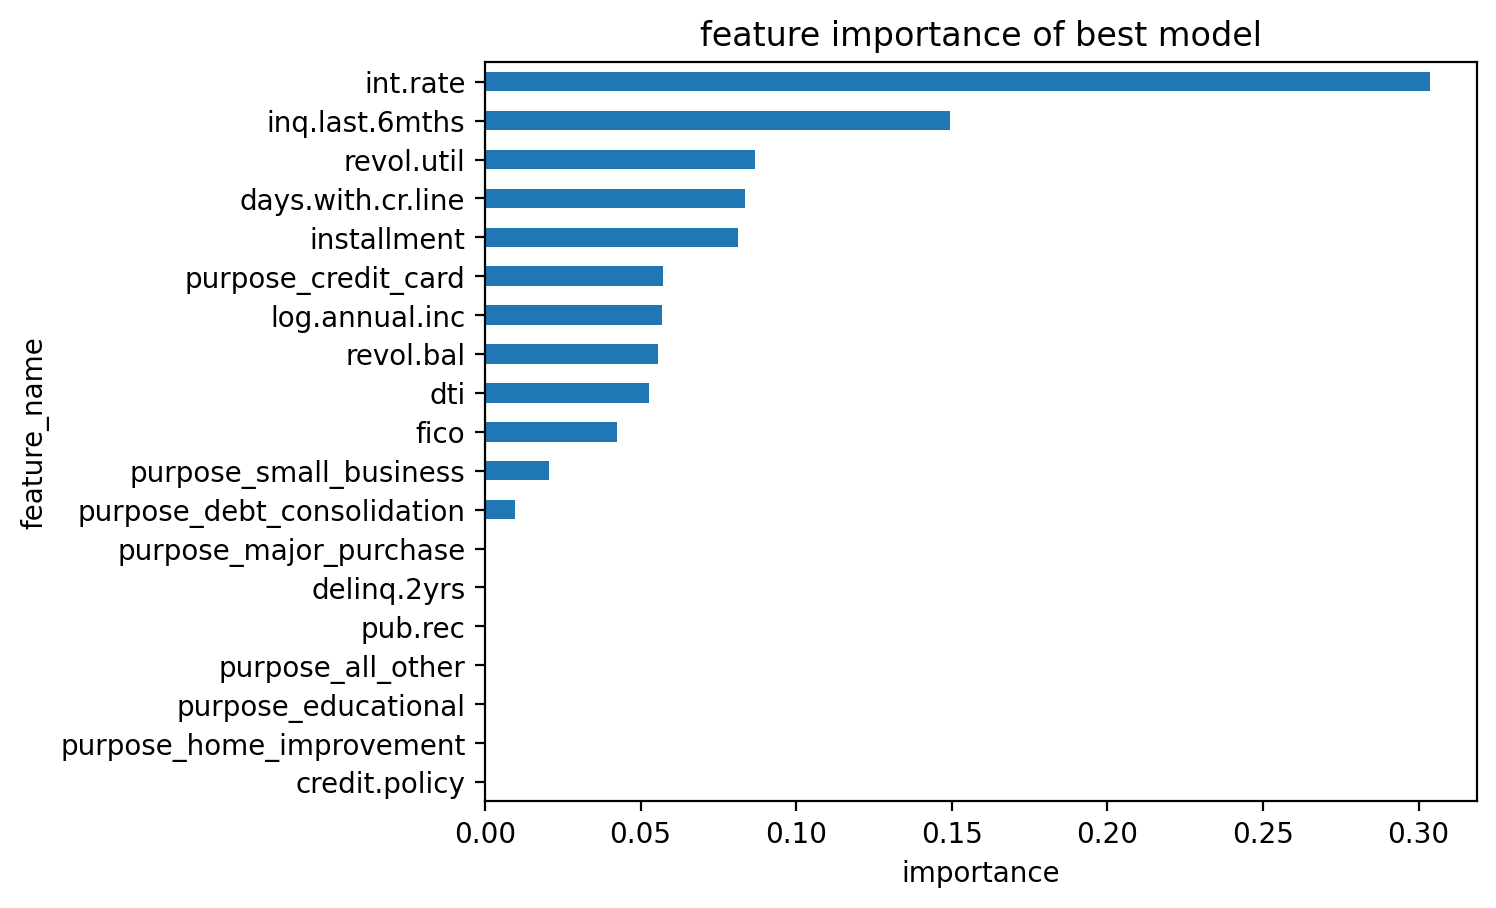

In [67]:
feat_df.sort_values('importance', ascending=True).plot(kind='barh', legend=None)
plt.xlabel('importance')
plt.title("feature importance of best model")

# Q5

## Random Forest model

1. Default Random Forest Classifier:
    - Initiate the Random Forest Classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `min_samples_split`, `max_depth`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

### Default Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
# code
rf_model = RandomForestClassifier(random_state=RANDOM_STATE)
rf_model.fit(X_train, y_train)

# predictions
train_preds = rf_model.predict(X_train)
val_preds = rf_model.predict(X_val)

In [93]:
print('Train accuracy: ', accuracy_score(y_train, train_preds))
print('Validation accuracy: ', accuracy_score(y_val, val_preds))

Train accuracy:  1.0
Validation accuracy:  0.6073825503355704


In [94]:
print("Confusion Matrix\n")
print(confusion_matrix(y_val, val_preds))
tn, fp, fn, tp = confusion_matrix(y_val, val_preds).ravel()

Confusion Matrix

[[191 115]
 [119 171]]


In [95]:
printPerformanceMetrics(y_val, val_preds)

Precision:  0.5979020979020979
Recall:  0.5896551724137931
Specificity:  0.6241830065359477
Balanced accuracy:  0.6069190894748704
F1 score:  0.59375


### Parameter tuning

#### min_samples_split, max_depth and n_estimators


*   Perform grid search (GridSearchCV) where you check for min_samples_split, max_depth, and n_estimators.
  - Using the best model provide the performance metrics for the validation set.

In [78]:
# define param grid
params = {'min_samples_split':np.linspace(2, 20, 5).astype(int),
          'max_depth': np.linspace(10, 100, 5).astype(int),
          'n_estimators':np.linspace(50, 500, 10).astype(int)}

In [79]:
params

{'min_samples_split': array([ 2,  6, 11, 15, 20]),
 'max_depth': array([ 10,  32,  55,  77, 100]),
 'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])}

In [80]:
# define grid search and classifier
rf_classifier = RandomForestClassifier(random_state=RANDOM_STATE)
grid_cv = GridSearchCV(rf_classifier, params, cv=3, n_jobs=-1, scoring='f1', verbose=3)

In [81]:
# fit grid
%time grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 250 candidates, totalling 750 fits
CPU times: user 4.03 s, sys: 745 ms, total: 4.77 s
Wall time: 6min 30s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 10,  32,  55,  77, 100]),
                         'min_samples_split': array([ 2,  6, 11, 15, 20]),
                         'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])},
             scoring='f1', verbose=3)

In [82]:
print(grid_cv.best_score_, grid_cv.best_params_)

0.6016263160743498 {'max_depth': 32, 'min_samples_split': 20, 'n_estimators': 150}


In [83]:
# get best model and predict
best_model = grid_cv.best_estimator_
val_preds = best_model.predict(X_val)

In [84]:
printPerformanceMetrics(y_val, val_preds)

Precision:  0.6046511627906976
Recall:  0.6275862068965518
Specificity:  0.6111111111111112
Balanced accuracy:  0.6193486590038315
F1 score:  0.6159052453468699


### Create a chart showing the feature importances based on the best model obtained.

In [85]:
# get feature importance
feat_df = pd.DataFrame(X_train.columns, columns=['feature_name'])
feat_df.index = feat_df.feature_name
feat_df['importance'] = best_model.feature_importances_

Text(0.5, 1.0, 'feature importance of best model - Random Forest')

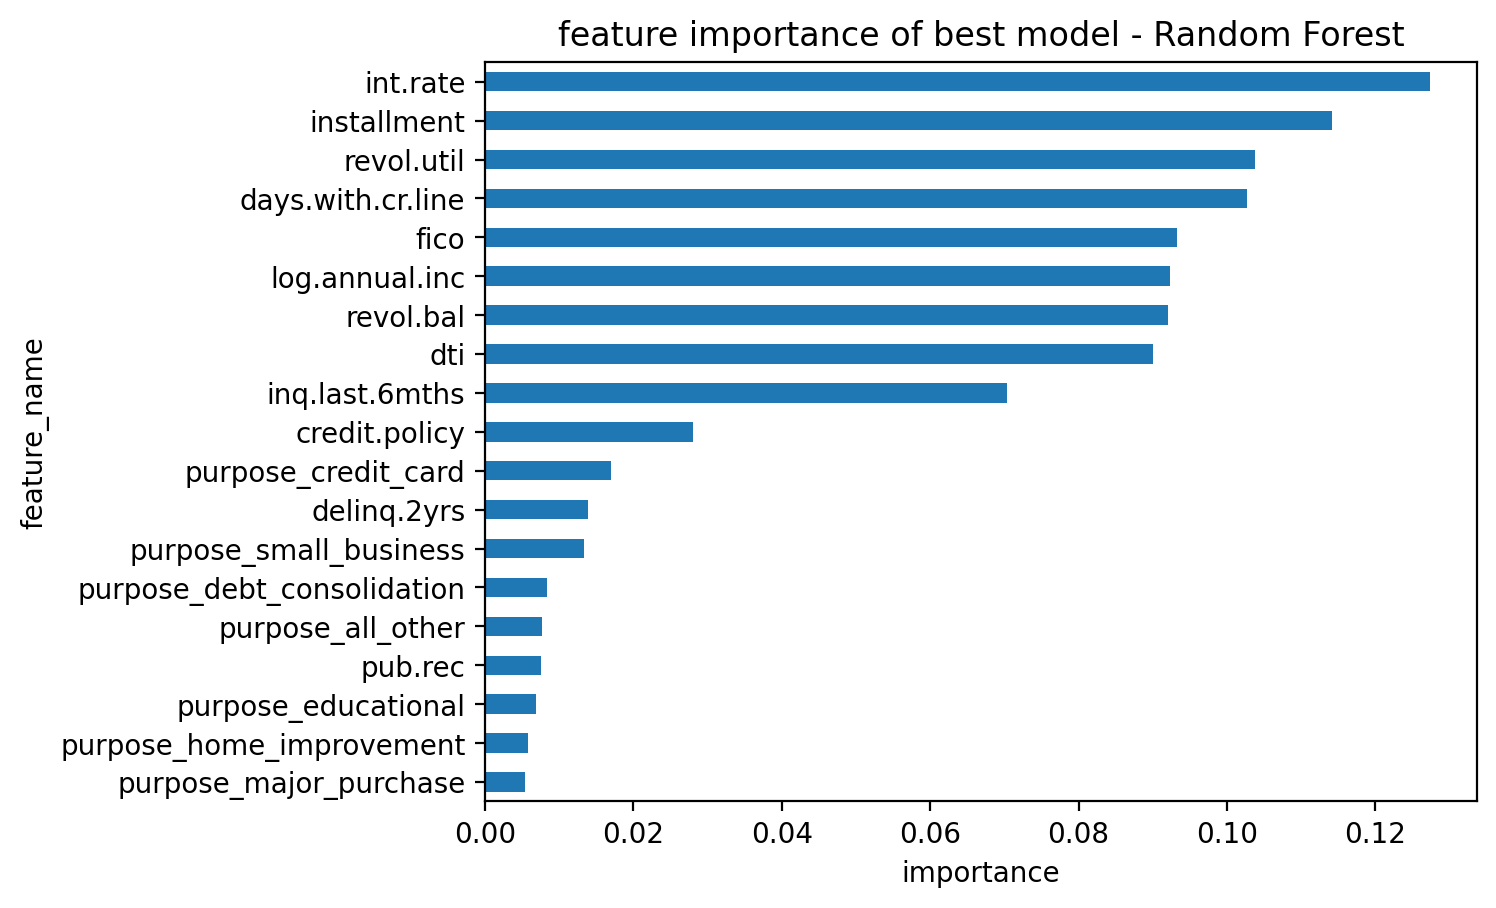

In [86]:
feat_df.sort_values('importance', ascending=True).plot(kind='barh', legend=None)
plt.xlabel('importance')
plt.title("feature importance of best model - Random Forest")

# Q6

## Adaboost model

1. Default Adaboost classifier:
    - Initiate the Adaboost classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
       
3. Create a chart showing the feature importances based on the best model obtained.

### Default Adaboost Classifier

In [42]:
from sklearn.ensemble import AdaBoostClassifier

In [97]:
# YOUR CODE
# code
ada_model = AdaBoostClassifier(random_state=RANDOM_STATE)
ada_model.fit(X_train, y_train)

# predictions
train_preds = ada_model.predict(X_train)
val_preds = ada_model.predict(X_val)

In [98]:
print('Train accuracy: ', accuracy_score(y_train, train_preds))
print('Validation accuracy: ', accuracy_score(y_val, val_preds))

Train accuracy:  0.6739373601789709
Validation accuracy:  0.5855704697986577


In [99]:
print("Confusion Matrix\n")
print(confusion_matrix(y_val, val_preds))
tn, fp, fn, tp = confusion_matrix(y_val, val_preds).ravel()

Confusion Matrix

[[177 129]
 [118 172]]


In [100]:
printPerformanceMetrics(y_val, val_preds)

Precision:  0.5714285714285714
Recall:  0.593103448275862
Specificity:  0.5784313725490197
Balanced accuracy:  0.5857674104124408
F1 score:  0.5820642978003383


### Parameter tuning

#### learning_rate and n_estimators

In [105]:
# define grid parameters
params = {'learning_rate': np.linspace(0.01, 1, 10),
          "n_estimators": np.linspace(50, 1000, 20).astype(int)}

In [106]:
params

{'learning_rate': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
 'n_estimators': array([  50,  100,  150,  200,  250,  300,  350,  400,  450,  500,  550,
         600,  650,  700,  750,  800,  850,  900,  950, 1000])}

In [107]:
# define grid search and classifier
ada_classifier = AdaBoostClassifier(random_state=RANDOM_STATE)
grid_cv = GridSearchCV(ada_classifier, params, cv=3, n_jobs=-1, scoring='f1', verbose=3)

In [108]:
# fit grid
%time grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
CPU times: user 4.85 s, sys: 1.11 s, total: 5.96 s
Wall time: 10min 9s


GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'n_estimators': array([  50,  100,  150,  200,  250,  300,  350,  400,  450,  500,  550,
        600,  650,  700,  750,  800,  850,  900,  950, 1000])},
             scoring='f1', verbose=3)

In [109]:
print(grid_cv.best_score_, grid_cv.best_params_)

0.5808412952051222 {'learning_rate': 0.34, 'n_estimators': 50}


In [110]:
# get best model and predict
best_model = grid_cv.best_estimator_
val_preds = best_model.predict(X_val)

In [111]:
printPerformanceMetrics(y_val, val_preds)

Precision:  0.5856164383561644
Recall:  0.5896551724137931
Specificity:  0.6045751633986928
Balanced accuracy:  0.597115167906243
F1 score:  0.5876288659793815


### Create a chart showing the feature importances based on the best model obtained.

In [112]:
# get feature importance
feat_df = pd.DataFrame(X_train.columns, columns=['feature_name'])
feat_df.index = feat_df.feature_name
feat_df['importance'] = best_model.feature_importances_

Text(0.5, 1.0, 'feature importance of best model - AdaBoost Classifier')

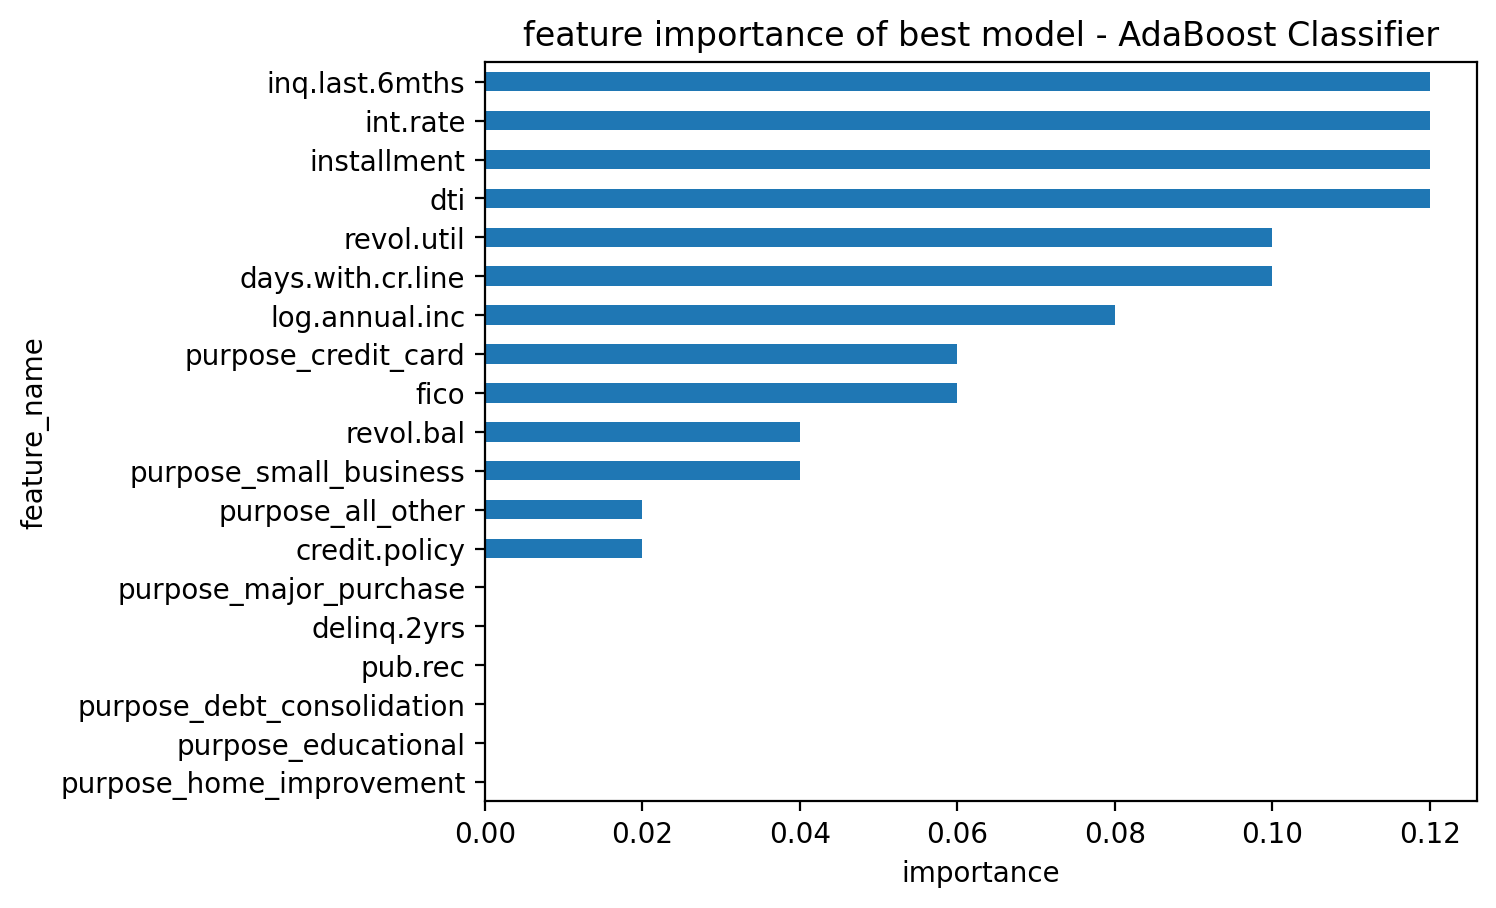

In [113]:
feat_df.sort_values('importance', ascending=True).plot(kind='barh', legend=None)
plt.xlabel('importance')
plt.title("feature importance of best model - AdaBoost Classifier")

# Q7

## Gradient Boosting Machine

1. Default Gradient Boosting classifier:
    - Initiate the Gradient Boosting classifier from the sklearn library. Keep all parameters with their default values. (No need to specify anything)
    - Fit the model
    - Make predictions
    - Calculate accuracy score. What are the **training** and **validation** accuracies of the model?
    - Create confusion matrix
    - Provide the performance metrics for the **validation** set.
    
    
2. Using the training data perform hyper-parameter tuning. Use an appropriate metric for scoring (f1 is generally good).
    - Perform grid search (`GridSearchCV`) where you check for `learning_rate`, and `n_estimators`.
        - Using the best model provide the performance metrics for the validation set.
        
3. Create a chart showing the feature importances based on the best model obtained.

### Default Gradient Boost Classifier

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

In [115]:
# YOUR CODE
grad_boost_model = GradientBoostingClassifier(random_state=RANDOM_STATE)
grad_boost_model.fit(X_train, y_train)

# predictions
train_preds = grad_boost_model.predict(X_train)
val_preds = grad_boost_model.predict(X_val)

In [116]:
print('Train accuracy: ', accuracy_score(y_train, train_preds))
print('Validation accuracy: ', accuracy_score(y_val, val_preds))

Train accuracy:  0.7986577181208053
Validation accuracy:  0.610738255033557


In [117]:
print("Confusion Matrix\n")
print(confusion_matrix(y_val, val_preds))
tn, fp, fn, tp = confusion_matrix(y_val, val_preds).ravel()

Confusion Matrix

[[193 113]
 [119 171]]


In [118]:
printPerformanceMetrics(y_val, val_preds)

Precision:  0.602112676056338
Recall:  0.5896551724137931
Specificity:  0.630718954248366
Balanced accuracy:  0.6101870633310795
F1 score:  0.5958188153310104


### Parameter tuning

#### learning_rate and n_estimators

In [138]:
# define grid parameters
params = {'learning_rate': list(set([round(x, 1) for x in np.linspace(0.01, 1, 15)])),
          "n_estimators": np.linspace(50, 1000, 10).astype(int)}

In [139]:
params

{'learning_rate': [0.0, 0.4, 0.1, 0.3, 0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
 'n_estimators': array([  50,  155,  261,  366,  472,  577,  683,  788,  894, 1000])}

In [140]:
# define grid search and classifier
grad_boost_classifier = GradientBoostingClassifier(random_state=RANDOM_STATE)
grid_cv = GridSearchCV(grad_boost_classifier, params, cv=3, n_jobs=-1, scoring='f1', verbose=3)

In [141]:
# fit grid
%time grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 110 candidates, totalling 330 fits
CPU times: user 3.58 s, sys: 735 ms, total: 4.32 s
Wall time: 6min 25s


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0, 0.4, 0.1, 0.3, 0.2, 0.5, 0.6,
                                           0.7, 0.8, 0.9, 1.0],
                         'n_estimators': array([  50,  155,  261,  366,  472,  577,  683,  788,  894, 1000])},
             scoring='f1', verbose=3)

In [142]:
print(grid_cv.best_score_, grid_cv.best_params_)

0.5846920368915656 {'learning_rate': 0.1, 'n_estimators': 50}


In [143]:
# get best model and predict
best_model = grid_cv.best_estimator_
val_preds = best_model.predict(X_val)

In [144]:
printPerformanceMetrics(y_val, val_preds)

Precision:  0.6006944444444444
Recall:  0.596551724137931
Specificity:  0.6241830065359477
Balanced accuracy:  0.6103673653369394
F1 score:  0.5986159169550174


### Create a chart showing the feature importances based on the best model obtained.

In [145]:
# get feature importance
feat_df = pd.DataFrame(X_train.columns, columns=['feature_name'])
feat_df.index = feat_df.feature_name
feat_df['importance'] = best_model.feature_importances_

Text(0.5, 1.0, 'feature importance of best model - AdaBoost Classifier')

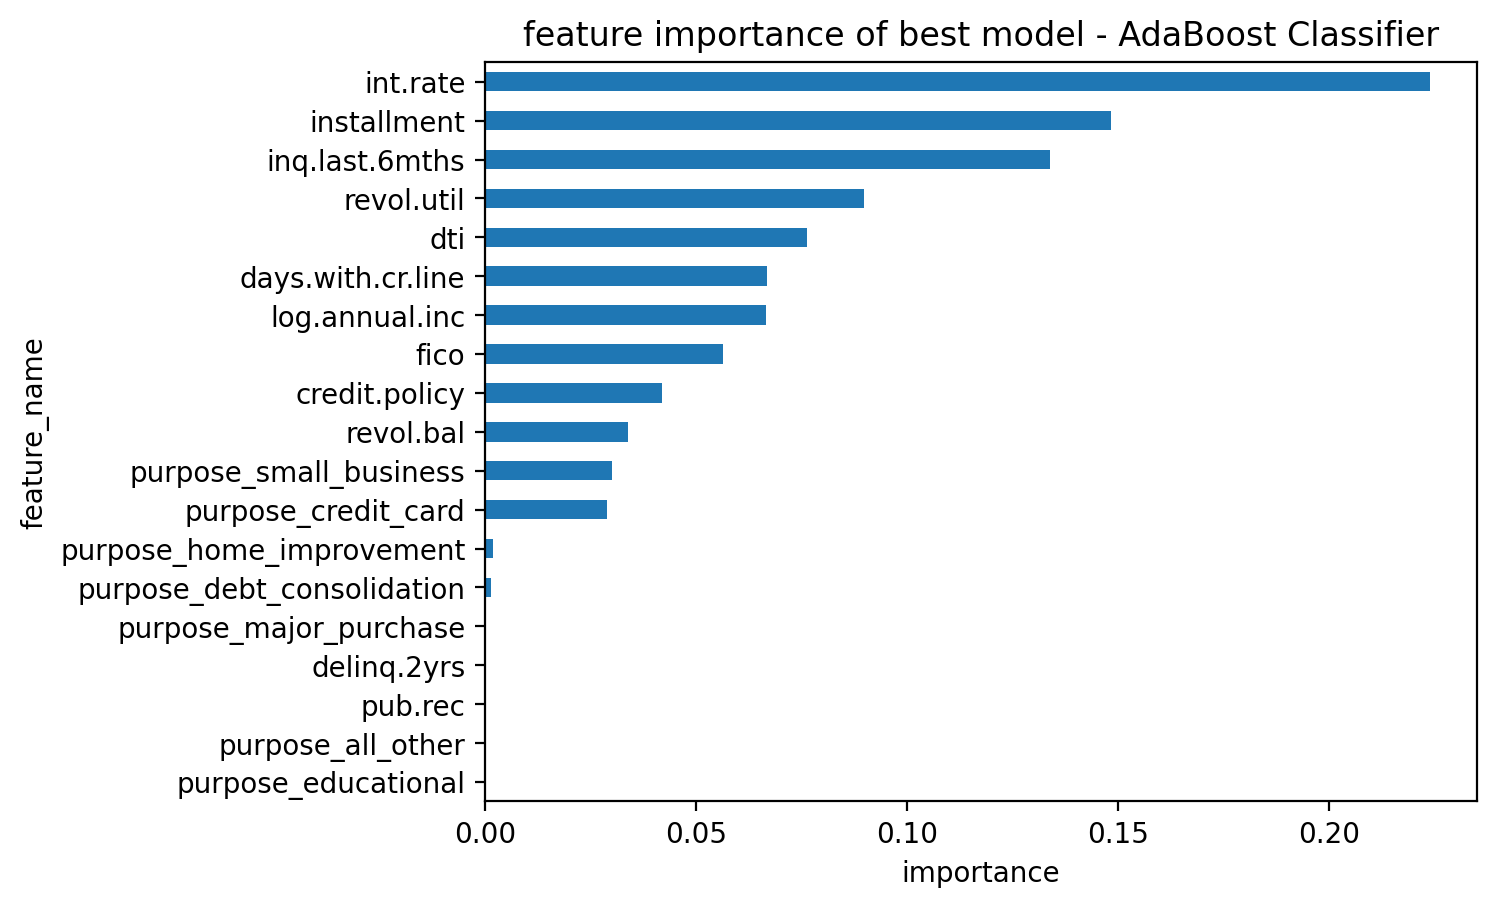

In [146]:
feat_df.sort_values('importance', ascending=True).plot(kind='barh', legend=None)
plt.xlabel('importance')
plt.title("feature importance of best model - AdaBoost Classifier")

# Q8 (15 points)

- Using one or more of the Decision Tree, Random Forest, Adaboost, and Gradient Boosting classifer models:
    - Think of other ways of improving the recall and F1-score and list at least two possibilities.
    - Implement both of the methods you proposed.
    - Is the model F1-score increasing?

## Ways to improve tree based models
Although, tree based models perform better than linear and few of the non-linear model, it's performance can be affected by many factors. There are ways to improve the accuracy of these tree based model. Few of them are listed below.

1.   **Feature selection**: Even though the dataset is small, we can still perform feature selection to improve generalization, as the model focuses on the most relevant features, potentially improving its ability to make predictions on new, unseen data.
2. **Different encoder**: Using the different encoder can improve the performance of the model.



### Feature selection

We will use Recursive Feature Elimination (RFE) from `sklearn.feature_selection` library. RFE works by recursively training the model on subsets of features, ranking the importance of each feature, and eliminating the least important features at each step.

We will do this for RandomForest Classifier as it has the highest performance amongst all models.

*best_rf_model_params = {'max_depth': 32, 'min_samples_split': 20, 'n_estimators': 150}*

In [160]:
from sklearn.feature_selection import RFE

In [161]:
# define best parameters for RandomForestClassifier
params = {'max_depth': 32, 'min_samples_split': 20, 'n_estimators': 150}

In [162]:
# define model
best_rf_model = RandomForestClassifier(**params, random_state=RANDOM_STATE)

In [163]:
# define RFE for feature selection (we will select 10 feature from all)
rfe_object = RFE(estimator=best_rf_model, n_features_to_select=15)
rfe_object.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(max_depth=32, min_samples_split=20,
                                     n_estimators=150, random_state=42),
    n_features_to_select=15)

In [164]:
# select best features for train, test and val
X_train_selected = rfe_object.transform(X_train)
X_test_selected = rfe_object.transform(X_test)
X_val_selected = rfe_object.transform(X_val)

In [165]:
# fit model
best_rf_model.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=32, min_samples_split=20, n_estimators=150,
                       random_state=42)

In [166]:
# predict
train_preds = best_rf_model.predict(X_train_selected)
val_preds = best_rf_model.predict(X_val_selected)
test_preds = best_rf_model.predict(X_test_selected)

In [167]:
print("Test performance\n")
printPerformanceMetrics(y_test, test_preds)

print("\nVal performance\n")
printPerformanceMetrics(y_val, val_preds)

Test performance

Precision:  0.5659722222222222
Recall:  0.6037037037037037
Specificity:  0.617737003058104
Balanced accuracy:  0.6107203533809038
F1 score:  0.5842293906810037

Val performance

Precision:  0.6077170418006431
Recall:  0.6517241379310345
Specificity:  0.6013071895424836
Balanced accuracy:  0.626515663736759
F1 score:  0.6289517470881864


Earlier reported performance of best model with hyperparameter tuning was 0.61 (F1-score).

Now, validation performance has increased to 0.62 (F1-score)

Recall has also improved from 0.62 to 0.65.

### Encoding techniques - Weight of Evidence

Encoding techniques can also have good impact on model performance. Here, we will use a technique weight of evidance from `category_encoders` package.

In [192]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 940.6 kB/s eta 0:00:00


In [193]:
# load methods
import category_encoders as ce

In [200]:
loans = pd.read_csv('loans.csv')

In [202]:
# split dataframe in train test and val
X = loans.drop('not.fully.paid',axis=1)
y = loans['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=RANDOM_STATE)

In [203]:
# define encoder
woe_encoder = ce.WOEEncoder()

In [204]:
X_train.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
1407,1,home_improvement,0.1126,328.64,10.434116,14.93,722,4980.000000,9528,35.8,1,0,0
2421,1,debt_consolidation,0.1426,411.67,11.350407,15.78,707,4530.041667,2335,97.3,3,0,0
382,1,debt_consolidation,0.0894,190.63,11.002100,23.18,732,3539.958333,22323,29.0,0,0,0
2426,0,debt_consolidation,0.1786,184.02,11.002100,5.30,617,720.000000,4333,95.4,4,0,0
2172,1,debt_consolidation,0.1565,510.80,11.482466,18.73,662,4440.041667,31485,58.6,0,0,0


In [207]:
# train woe encoder
X_train['purpose'] = woe_encoder.fit_transform(X_train['purpose'], y_train)

In [208]:
X_train.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
1407,1,-0.095087,0.1126,328.64,10.434116,14.93,722,4980.000000,9528,35.8,1,0,0
2421,1,-0.003127,0.1426,411.67,11.350407,15.78,707,4530.041667,2335,97.3,3,0,0
382,1,-0.003127,0.0894,190.63,11.002100,23.18,732,3539.958333,22323,29.0,0,0,0
2426,0,-0.003127,0.1786,184.02,11.002100,5.30,617,720.000000,4333,95.4,4,0,0
2172,1,-0.003127,0.1565,510.80,11.482466,18.73,662,4440.041667,31485,58.6,0,0,0


In [209]:
# transform test and val
X_val['purpose'] = woe_encoder.transform(X_val['purpose'])
X_test['purpose'] = woe_encoder.transform(X_test['purpose'])

In [210]:
# fit on best random forest model
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=32, min_samples_split=20, n_estimators=150,
                       random_state=42)

In [211]:
# predict
train_preds = best_rf_model.predict(X_train)
test_preds = best_rf_model.predict(X_test)
val_preds = best_rf_model.predict(X_val)

In [212]:
print("Test performance\n")
printPerformanceMetrics(y_test, test_preds)

print("\nVal performance\n")
printPerformanceMetrics(y_val, val_preds)

Test performance

Precision:  0.56
Recall:  0.6222222222222222
Specificity:  0.5963302752293578
Balanced accuracy:  0.60927624872579
F1 score:  0.5894736842105264

Val performance

Precision:  0.5770491803278689
Recall:  0.6068965517241379
Specificity:  0.5784313725490197
Balanced accuracy:  0.5926639621365788
F1 score:  0.5915966386554622


Model performance has not improved. Only feature selection technique was able to improve the model performance

# Q9 (15 points)

- Choose the best fitted model for each of the classifiers (1 model for each of Decision Tree, Random Forest, Adaboost, and Gradient Boosting)
- Create a table summarizing results on the **test set**:
    - Create confusion matrix for each model
    - Provide the performance metrics on the test set for each model.

Which one is the winner among all?

In [46]:
# YOUR CODE
# define params
dtree_params = {'max_depth': 9, 'min_samples_split': 32}
rf_params = {'max_depth': 32, 'min_samples_split': 20, 'n_estimators': 150}
ada_params = {'learning_rate': 0.34, 'n_estimators': 50}
grbst_params = {'learning_rate': 0.1, 'n_estimators': 50}

In [69]:
# define model
dtree_best_model = DecisionTreeClassifier(**dtree_params, random_state=RANDOM_STATE)
rf_best_model = RandomForestClassifier(**rf_params, random_state=RANDOM_STATE)
ada_best_model = AdaBoostClassifier(**ada_params, random_state=RANDOM_STATE)
grdbst_best_model = GradientBoostingClassifier(**grbst_params, random_state=RANDOM_STATE)

In [70]:
# fit models
dtree_best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_split=32, random_state=42)

In [71]:
rf_best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=32, min_samples_split=20, n_estimators=150,
                       random_state=42)

In [72]:
ada_best_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.34, random_state=42)

In [73]:
grdbst_best_model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

In [108]:
# results summary table
results_df = pd.DataFrame()
model_list = [dtree_best_model, rf_best_model, ada_best_model, grdbst_best_model]

for model in model_list:
  print(model)
  test_preds = model.predict(X_test)
  precision, recall, specificity, balanced_accuracy, f1_score = printPerformanceMetrics(y_test, test_preds)
  tmp_lst = [[precision, recall, specificity, balanced_accuracy, f1_score]]
  tmp_df = pd.DataFrame(tmp_lst, columns = [ 'precision', 'recall',
                                            'specificity', 'balanced_accuracy', 'f1_score'])
  results_df = pd.concat([results_df, tmp_df], axis=0)
  print('\n')

DecisionTreeClassifier(max_depth=9, min_samples_split=32, random_state=42)
Precision:  0.5311203319502075
Recall:  0.4740740740740741
Specificity:  0.654434250764526
Balanced accuracy:  0.5642541624193
F1 score:  0.5009784735812133


RandomForestClassifier(max_depth=32, min_samples_split=20, n_estimators=150,
                       random_state=42)
Precision:  0.5704225352112676
Recall:  0.6
Specificity:  0.6269113149847095
Balanced accuracy:  0.6134556574923548
F1 score:  0.5848375451263538


AdaBoostClassifier(learning_rate=0.34, random_state=42)
Precision:  0.5483870967741935
Recall:  0.5666666666666667
Specificity:  0.6146788990825688
Balanced accuracy:  0.5906727828746177
F1 score:  0.5573770491803278


GradientBoostingClassifier(n_estimators=50, random_state=42)
Precision:  0.5666666666666667
Recall:  0.5666666666666667
Specificity:  0.6422018348623854
Balanced accuracy:  0.604434250764526
F1 score:  0.5666666666666667




In [109]:
results_df.index = [str(model) for model in model_list]

In [110]:
results_df.sort_values('f1_score', ascending=False)

,precision,recall,specificity,balanced_accuracy,f1_score
"RandomForestClassifier(max_depth=32, min_samples_split=20, n_estimators=150,\n random_state=42)",0.570423,0.600000,0.626911,0.613456,0.584838
"GradientBoostingClassifier(n_estimators=50, random_state=42)",0.566667,0.566667,0.642202,0.604434,0.566667
"AdaBoostClassifier(learning_rate=0.34, random_state=42)",0.548387,0.566667,0.614679,0.590673,0.557377
"DecisionTreeClassifier(max_depth=9, min_samples_split=32, random_state=42)",0.531120,0.474074,0.654434,0.564254,0.500978


# Great Job!